# Integrated values and grid-scale precip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Data & Settings

In [28]:
figpath = '../../plots/'

color_v1 = "maroon"
color_v0 = "steelblue"
color_hatpro = "darkorange"

label_v1 = "SK-P"
label_v0 = "Hande"


In [66]:
# load data 
df_intvals_v1 = pd.read_csv('../../data/processed/df_intvals_precip_v1_AO_2021.csv')
df_intvals_v0 = pd.read_csv('../../data/processed/df_intvals_precip_v0_AO_2021.csv')
df_intvals_hatpro = pd.read_csv('../../data/processed/df_intvals_hatpro_AO_2021.csv')

display(df_intvals_v1.describe())

,Unnamed: 0,TQC,TQI,TQS,TQR,TQV,RAIN_GSP,SNOW_GSP
count,504000.000000,504000.000000,5.040000e+05,5.040000e+05,5.040000e+05,504000.000000,504000.000000,504000.000000
mean,251999.500000,0.040854,2.071675e-02,2.377291e-02,8.880955e-03,10.171228,0.526867,0.051139
std,145492.412172,0.090424,4.259384e-02,7.278500e-02,2.891788e-02,5.219010,1.314475,0.219968
min,0.000000,0.000000,1.312985e-16,7.245766e-19,9.555869e-26,1.924892,0.000000,0.000000
25%,125999.750000,0.000000,1.304702e-07,1.340432e-07,3.410962e-13,4.700648,0.000000,0.000000
50%,251999.500000,0.000000,8.447113e-05,2.501258e-06,9.656502e-08,11.352491,0.009665,0.000001
75%,377999.250000,0.031704,1.333547e-02,7.412698e-04,1.645623e-03,14.212500,0.194678,0.000180
max,503999.000000,1.240803,3.288728e-01,7.365816e-01,3.621199e-01,23.583553,7.995235,1.584967


In [67]:
# Only use intvals_v0 and intval_v1 where RAIN_GSP < 0.01
df_intvals_v0_rainflag = df_intvals_v0[df_intvals_v0['RAIN_GSP'] < 0.05]
df_intvals_v1_rainflag = df_intvals_v1[df_intvals_v1['RAIN_GSP'] < 0.05]

## 2. Analysis & Plots

In [68]:
# Create bins for TQV
TQV_bins = np.arange(0, 30, 2)
TQC_bins = np.arange(0.01, 1.7, 0.1)
TQC_bins_linscale = np.arange(0.01, 0.5, 0.025)
TQI_bins = np.arange(0, 0.35, 0.02)

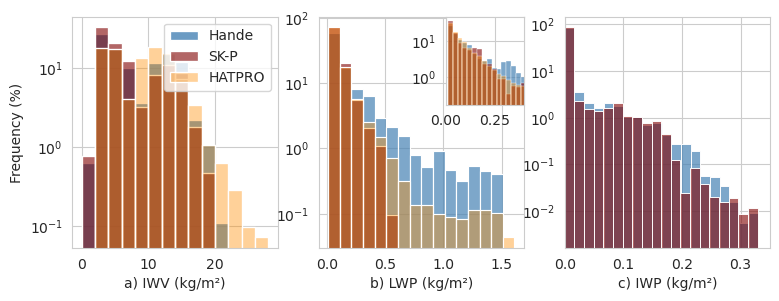

In [70]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,3,figsize=(9, 3))
# plot 'TQV' for v1 and v0 as histogram using percentage in first subplot
sns.histplot(data=df_intvals_v0_rainflag, x="TQV", bins=TQV_bins, color=color_v0, label=label_v0, alpha=0.8, ax=ax[0], 
             stat='percent', log_scale=(False,True))
sns.histplot(data=df_intvals_v1_rainflag, x="TQV", bins=TQV_bins, color=color_v1, label=label_v1, alpha=0.6, ax=ax[0], 
             stat='percent', log_scale=(False,True))
sns.histplot(data=df_intvals_hatpro, x="IWV", bins=TQV_bins, color=color_hatpro, label='HATPRO', alpha=0.4, ax=ax[0], 
             stat='percent', log_scale=(False,True))
ax[0].set_xlabel('a) IWV (kg/m²)')
ax[0].set_ylabel('Frequency (%)')


# now TQC
sns.histplot(data=df_intvals_v0_rainflag, x="TQC", bins=TQC_bins, color=color_v0, label=label_v0, alpha=0.7, ax=ax[1], 
             stat='percent', log_scale=(False,True))
sns.histplot(data=df_intvals_v1_rainflag, x="TQC", bins=TQC_bins, color=color_v1, label=label_v1, alpha=0.6, ax=ax[1], 
             stat='percent', log_scale=(False,True))
sns.histplot(data=df_intvals_hatpro, x="LWP", bins=TQC_bins, color=color_hatpro, label='HATPRO', alpha=0.4, ax=ax[1],
             stat='percent', log_scale=(False,True))
ax[1].set_xlabel('b) LWP (kg/m²)')
ax[1].set_ylabel('')
#ax[1].set_xlim(0, 0.4)
#ax[1].legend(loc='upper right')


# add small plot in the upper right corner of the center plot
axins = ax[1].inset_axes([0.62, 0.62, 0.38, 0.38])
sns.histplot(data=df_intvals_v0_rainflag, x="TQC", bins=TQC_bins_linscale, color=color_v0, label=label_v0, alpha=0.7, ax=axins,
                stat='percent', log_scale=(False,True))
sns.histplot(data=df_intvals_v1_rainflag, x="TQC", bins=TQC_bins_linscale, color=color_v1, label=label_v1, alpha=0.6, ax=axins,
                stat='percent', log_scale=(False,True))
sns.histplot(data=df_intvals_hatpro, x="LWP", bins=TQC_bins_linscale, color=color_hatpro, label='HATPRO', alpha=0.4, ax=axins,
             stat='percent', log_scale=(False,True))
axins.set_xlabel('')
axins.set_ylabel('')
axins.set_xlim(0, 0.4)
#axins.set_title('Distribution', fontsize=8)

# TQI
sns.histplot(data=df_intvals_v0_rainflag, x="TQI", bins=20, color=color_v0, label=label_v0, alpha=0.7, ax=ax[2],
               stat='percent', log_scale=(False,True))
sns.histplot(data=df_intvals_v1_rainflag, x="TQI", bins=20, color=color_v1, label=label_v1, alpha=0.6, ax=ax[2],
               stat='percent', log_scale=(False,True))
sns.histplot(data=df_intvals_hatpro, x="IWV", bins=20, color=color_hatpro, label='HATPRO', alpha=0, ax=ax[2],
            stat='percent', log_scale=(False,True))
ax[2].set_xlabel('c) IWP (kg/m²)')
ax[2].set_ylabel('')
ax[2].set_xlim(0, 0.35)
# also add hatpro color to legend (could be taken from axins)
ax[0].legend(loc='upper right') #, labels=['Hande', 'SK-P', 'HATPRO'])
#ax[2].legend(loc='upper right', labels=[label_v0, label_v1, 'HATPRO'])


#TQS
# sns.histplot(data=df_intvals_v0, x="TQS", bins=20, color=color_v0, label=label_v0, alpha=0.7, ax=ax[1,0],
                # stat='percent', log_scale=(False,True))
# sns.histplot(data=df_intvals_v1, x="TQS", bins=20, color=color_v1, label=label_v1, alpha=0.6, ax=ax[1,0],
                # stat='percent', log_scale=(False,True))
# ax[1,0].set_xlabel('TQS (kg/m²)')
# ax[1,0].set_ylabel('Frequency (%)')
# 
# 
#TQR
# sns.histplot(data=df_intvals_v0, x="TQR", bins=20, color=color_v0, label=label_v0, alpha=0.7, ax=ax[1,2],
                # stat='percent', log_scale=(False,True))
# sns.histplot(data=df_intvals_v1, x="TQR", bins=20, color=color_v1, label=label_v1, alpha=0.6, ax=ax[1,2],
                # stat='percent', log_scale=(False,True))
# ax[1,2].set_xlabel('TQR (kg/m²)')
# ax[1,2].set_ylabel('')lwp
# ax[1,2].legend(loc='upper right')

plt.savefig(figpath + 'integrated_values_AO_2021_v2_allflagged.svg', dpi=300, bbox_inches='tight')


### 3. Stats

In [72]:
describe_v0 = df_intvals_v0_rainflag.describe()
describe_v1 = df_intvals_v1_rainflag.describe()
describe_hatpro = df_intvals_hatpro.describe()

display(describe_v0)
display(describe_v1)
display(describe_hatpro)


,Unnamed: 0,TQC,TQI,TQS,TQR,TQV,RAIN_GSP,SNOW_GSP
count,349382.000000,349382.000000,3.493820e+05,3.493820e+05,3.493820e+05,349382.000000,349382.000000,349382.000000
mean,280181.890355,0.044786,1.398737e-02,1.181504e-02,9.755593e-05,8.316549,0.004645,0.081091
std,152272.472968,0.143582,3.636883e-02,4.535846e-02,1.515044e-03,4.703263,0.010389,0.328144
min,0.000000,0.000000,1.305922e-16,2.545204e-18,1.539815e-181,1.927440,0.000000,0.000000
25%,145760.250000,0.000000,2.114906e-09,4.717166e-09,6.240842e-15,3.908458,0.000000,0.000000
50%,325356.500000,0.000000,1.313869e-05,1.361518e-06,2.099291e-11,6.372034,0.000000,0.000001
75%,412701.750000,0.010182,4.200585e-03,4.537645e-05,2.607752e-07,12.754391,0.003160,0.000414
max,500047.000000,1.507267,3.301169e-01,5.513089e-01,9.836936e-02,21.106579,0.049991,2.997310


,Unnamed: 0,TQC,TQI,TQS,TQR,TQV,RAIN_GSP,SNOW_GSP
count,285094.000000,285094.000000,2.850940e+05,2.850940e+05,2.850940e+05,285094.000000,285094.000000,285094.000000
mean,310531.280837,0.014637,1.234715e-02,9.861521e-03,9.087380e-04,7.185260,0.003931,0.075728
std,149154.697317,0.048342,3.377467e-02,3.851295e-02,5.434786e-03,4.363615,0.009496,0.266701
min,0.000000,0.000000,1.312985e-16,7.245766e-19,9.555869e-26,1.924892,0.000000,0.000000
25%,177535.250000,0.000000,6.378234e-11,5.627941e-10,4.169378e-15,3.644730,0.000000,0.000000
50%,357266.500000,0.000000,4.387033e-06,1.255587e-06,2.642957e-12,5.392937,0.000000,0.000005
75%,428539.750000,0.000000,2.246487e-03,1.845032e-05,3.642517e-07,11.312011,0.002518,0.000799
max,499813.000000,0.565736,3.288728e-01,6.903769e-01,2.472706e-01,19.457059,0.049999,1.584967


,Unnamed: 0,LWP,IWV
count,3.406579e+06,3.035742e+06,3.035742e+06
mean,1.703289e+06,6.439849e-02,9.201722e+00
std,9.833948e+05,1.863930e-01,4.619438e+00
min,0.000000e+00,-1.621298e-02,2.453915e+00
25%,8.516445e+05,6.475820e-04,4.673852e+00
50%,1.703289e+06,1.247828e-02,9.702704e+00
75%,2.554934e+06,6.530566e-02,1.233816e+01
max,3.406578e+06,3.004606e+00,4.739595e+01


In [73]:
# only select TQC or LWP and only values between 0.01 and 0.5
df_intvals_v0_TQC = df_intvals_v0_rainflag[['TQC']].loc[(df_intvals_v0_rainflag['TQC'] > 0.01) &
                                                        (df_intvals_v0_rainflag['TQC'] < 0.5)]
df_intvals_v1_TQC = df_intvals_v1_rainflag[['TQC']].loc[(df_intvals_v1_rainflag['TQC'] > 0.01) & 
                                                        (df_intvals_v1_rainflag['TQC'] < 0.5)]
df_intvals_hatpro_LWP = df_intvals_hatpro[['LWP']].loc[(df_intvals_hatpro['LWP'] > 0.01) & (df_intvals_hatpro['LWP'] < 0.5)]

display(df_intvals_v0_TQC.describe())
display(df_intvals_v1_TQC.describe())
display(df_intvals_hatpro_LWP.describe())


,TQC
count,80016.000000
mean,0.116274
std,0.112675
min,0.010003
25%,0.031867
50%,0.075848
75%,0.156422
max,0.499993


,TQC
count,47461.000000
mean,0.085398
std,0.086301
min,0.010002
25%,0.024739
50%,0.048697
75%,0.126475
max,0.499667


,LWP
count,1.538349e+06
mean,9.006186e-02
std,8.920833e-02
min,1.000002e-02
25%,2.807562e-02
50%,5.845279e-02
75%,1.180084e-01
max,4.999744e-01


In [74]:
df_intvals_v0.RAIN_GSP #.plot.hist(bins=100, color=color_v0, label=label_v0, alpha=0.7)

0         0.000568
1         0.000568
2         0.000568
3         0.000568
4         0.000568
            ...   
503995    1.622863
503996    1.622923
503997    1.622983
503998    1.623043
503999    1.623102
Name: RAIN_GSP, Length: 504000, dtype: float64